Simulacion de neurona de Izhikevich.

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# 1) Inicializar parametros
tmax = 1000
dt = 0.5

In [3]:
# 1.1) Parametros de red / neurona
a = 0.02 #RS,IB: 0.02, FS: 0.1
b = 0.2 #RS, IB, FS: 0.2
c = -65 #RS, FS: -65 IB: -55
d = 8. #RS: 8, IB: 4, FS: 2

In [4]:
# 1.2) Parametros iniciales
Iapp = 10
tr = array([200.,700])/dt #tiempo

In [5]:
# 2) Reservar memoria
T = ceil(tmax/dt)
v = zeros(T)
u = zeros(T)
v[0] = -70 #Potencial de reposo
u[0] = -14 #Estado estable

In [6]:
# 3) Iteracion sobre el tiempo
for t in arange(T-1):
    # 3.1) Leo la entrada
    if t > tr[0] and t < tr[1]:
        I = Iapp
    else:
        I = 0
        
    if v[t] < 35:
        # 3.2 Actualizar ODE
        dv = (0.04 * v[t] + 5) * v[t] + 140 - u[t]
        v[t+1] = v[t] + (dv + I) * dt
        du = a * (b * v[t] - u[t])
        u[t+1] = u[t] + dt * du
    else:
        # 3.3 Spike!
        v[t] = 35
        v[t+1] = c
        u[t+1] = u[t] + d

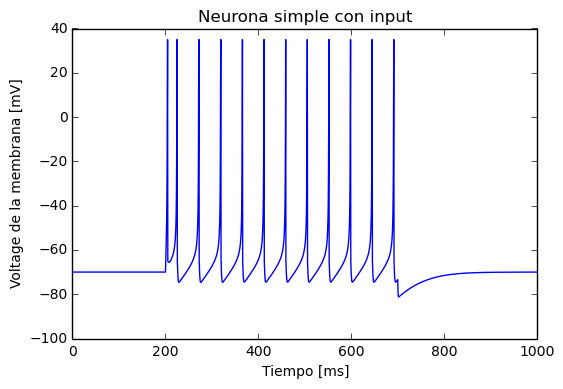

In [7]:
# 4) Ploteo los resultados
figure()
tvec = arange(0., tmax, dt)
plot(tvec, v, 'b', label='Voltage')
xlabel('Tiempo [ms]')
ylabel('Voltage de la membrana [mV]')
title("Neurona simple con input")
show()